## Car price Analysis

Importing required libraries

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
# % matplotlib inline 

### Loading car data and transforming it into a DataFrame for analysis


In [7]:
cars =  pd.read_csv("data/CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Understanding the name of the columns using the data dictionary file.

In [28]:
dictionary = pd.read_excel("data/Data Dictionary - carprices.xlsx")
column_values = dictionary["Unnamed: 11"]
column_values[3:28]


3              Unique id of each observation (Interger)
4     Its assigned insurance risk rating, A value of...
5                     Name of car company (Categorical)
6         Car fuel type i.e gas or diesel (Categorical)
7                Aspiration used in a car (Categorical)
8                Number of doors in a car (Categorical)
9                             body of car (Categorical)
10                    type of drive wheel (Categorical)
11                 Location of car engine (Categorical)
12                            Weelbase of car (Numeric)
13                              Length of car (Numeric)
14                               Width of car (Numeric)
15                              height of car (Numeric)
16    The weight of a car without occupants or bagga...
17                        Type of engine. (Categorical)
18             cylinder placed in the car (Categorical)
19                                Size of car (Numeric)
20                     Fuel system of car (Categ

In [47]:
cars["fuelsystem"].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

## 1. Data understanding and checking for abnormalies 

Doing summary statistics for numerical columns in our data

In [8]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Understanding the data types we are working with

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Checking for null values in our data

In [29]:
#checking for null values
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Checking for duplicates in our columns

In [39]:
#iterating through each column checking for duplicates
for column in cars.columns:
    duplicates = cars[column].duplicated()
    print(f"Column '{column}': {duplicates.any()} duplicates")


Column 'car_ID': False duplicates
Column 'symboling': True duplicates
Column 'CarName': True duplicates
Column 'fueltype': True duplicates
Column 'aspiration': True duplicates
Column 'doornumber': True duplicates
Column 'carbody': True duplicates
Column 'drivewheel': True duplicates
Column 'enginelocation': True duplicates
Column 'wheelbase': True duplicates
Column 'carlength': True duplicates
Column 'carwidth': True duplicates
Column 'carheight': True duplicates
Column 'curbweight': True duplicates
Column 'enginetype': True duplicates
Column 'cylindernumber': True duplicates
Column 'enginesize': True duplicates
Column 'fuelsystem': True duplicates
Column 'boreratio': True duplicates
Column 'stroke': True duplicates
Column 'compressionratio': True duplicates
Column 'horsepower': True duplicates
Column 'peakrpm': True duplicates
Column 'citympg': True duplicates
Column 'highwaympg': True duplicates
Column 'price': True duplicates


We shall not drop the duplicates because we are analyzing different models of cars made by different manufacturers. The duplicates can be accounted for by saying cars can have the same specifications although they are made independently by different car dealers. Dropping the duplicates might lead to losing a lot of data which we need for our analysis.

# 2. Exploratory Data Analysis

Here we are going to check for relationships between our columns using plots and graphs. We will also plot exploratory plots to help us further understand our data i.e Knowing which brand of cars was sold more . This analysis is also essential for our modelling stage since we will have already identify the columns that have linear relationship to our target.

### Looking at the distribution of each column to understand the type of distribution

In [68]:
# function to plot histograms
def plot_histograms(data):
    
    sns.set(style="dark")

    num_columns = len(data.columns)

    # Calculating the number of rows and columns for the subplots
    num_rows, num_cols = int(num_columns**0.5), -(-num_columns//int(num_columns**0.5))

    f, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i, column in enumerate(data.columns):
        row, col = i // num_cols, i % num_cols
        sns.histplot(data[column], kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Histogram of {column}')
        axes[row, col].set_xlabel('Values')

    # Remove any empty subplots
    for i in range(num_columns, num_rows * num_cols):
        f.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show();


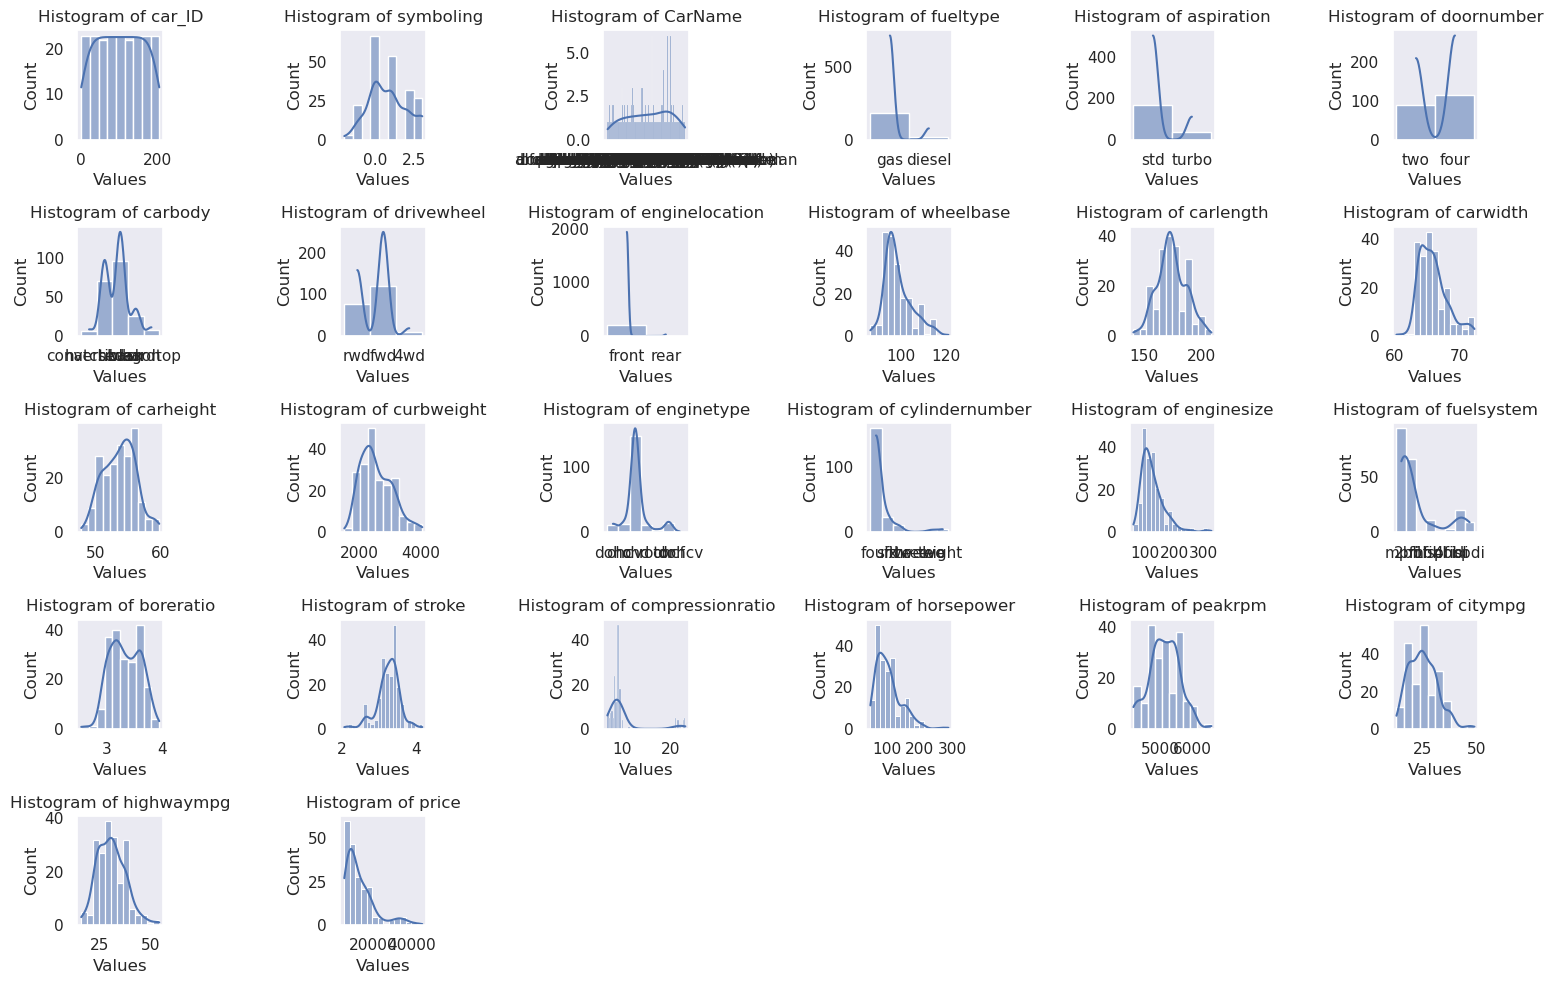

In [69]:
plot_histograms(cars)

From the above visuals we can see most columns almost follow a normal distribution. The variables that form a bell shape(or almost) curve indicates that they follow a  normal distribution. The other variables have their own unique distribution as well. Others have a positive skew while others have a negative skew.

### Investigating the top ten car models in referrence to price

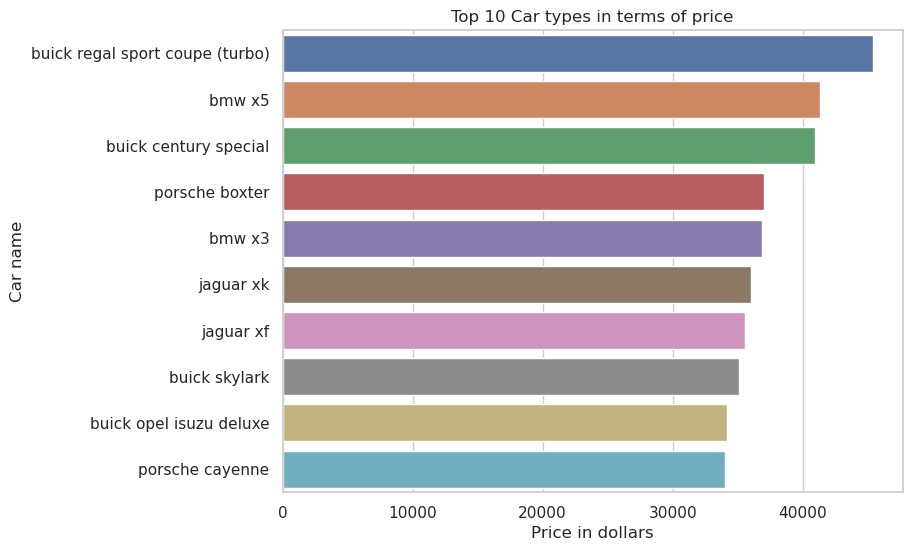

In [95]:
sorted = cars.sort_values(by='price', ascending=False)

N = 10
top_cars = sorted.head(N)

# potting a horizontal bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x='price', y='CarName', data=top_cars, orient='h')
plt.xlabel('Price in dollars')
plt.ylabel('Car name')
plt.title('Top {} Car types in terms of price'.format(N))
plt.show()


